# Plotting many signals

Opening several signals one by one and plotting them individually might become tedious. In the `ipfnpytools` package you can read and plot several signals using two functions:

In [3]:
from ipfnpytools.plot import plot_signals
import ipfnpytools.aug_read as aug_read
#If you want to use the darklab style you also need to import pyplot
#import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

In [4]:
shotnr = 35647
names = ["H-1", "H-5", "PECRH", "PNI", "PICRFc",r"D_tot",r"N_tot"]
diags = 2*["DCN"] + ["ECS","NIS","ICP"] + 2*["UVS"]

In [5]:
data = aug_read.many_signals(
    diagnostics=diags,
    names=names,
    shots=[shotnr])

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


plot_signals({...}) took 0.216594 seconds


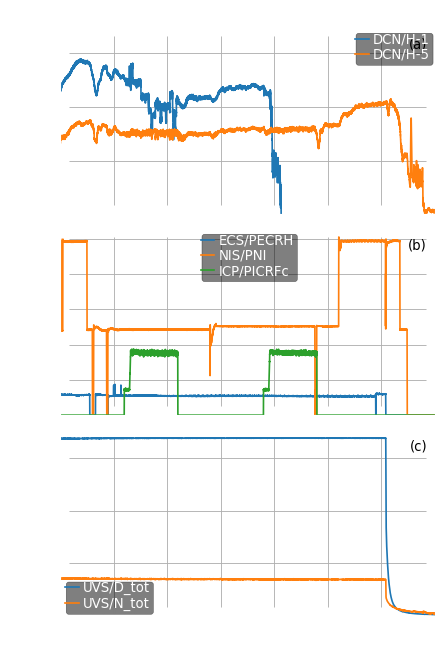

In [6]:
fig, axes, fig_name = plot_signals(
    data=data,
    postfixes="overview",
    boxes=([0]*2 + [1]*3 + [2]*2),
    maintain_colors=True,
    legend_kw=dict(loc='best'),
    signal_multipliers=([1E-19] * 2 + [1E-6]*3 + [1E-22]*2),
    y_labels=[r"$\overline{n_e}$ [$10^{19}m^{-3}]$", r"[MW]", r"$[10^{21}e/s]$"], 
    y_mins=0.0,
    t_begin=1, t_end=8,
    title=r'#'+str(shotnr)    
)

It is easy to compare discahrges side by side, just increase the number of shots on the list.

In [22]:
shotnrs = [34532, 33988]
names = (["H-0","H-5","PECRH","PNI","PICRFc",r"D_tot",r"N_tot",r"Pre_OuDi",r"Pre_InDi","F12","F18"])*len(shotnrs)
diags = (2*["DCN"] + ["ECS","NIS","ICP"] + 2*["UVS"] + 2*["MSQ"] +2*["IOC"])*len(shotnrs)
nsigs = len(diags)/len(shotnrs)

data = aug_read.many_signals(
    diagnostics=diags,
    names=names,
    shots=[34532]*nsigs+[33988]*nsigs)

/home/guimas/anaconda3/envs/toki/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: UserWarning: not reading signal ICP/PICRFc due to PyddError: (u'libddww error: Error by DDopen (8.1): shotfile does not exist !', {'function': 'shotfile.open', 'trace': ['_run_module_as_main', '_run_code', '<module>', 'launch_instance', 'IPKernelApp.start', 'ZMQIOLoop.start', 'null_wrapper', 'ZMQStream._handle_events', 'ZMQStream._handle_recv', 'ZMQStream._run_callback', 'null_wrapper', 'IPythonKernel.dispatcher', 'IPythonKernel.dispatch_shell', 'IPythonKernel.execute_request', 'IPythonKernel.do_execute', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_ast_nodes', 'ZMQInteractiveShell.run_code', '<module>', 'many_signals', 'shotfile.__init__', 'shotfile.open'], 'diagnostic': 'ICP', 'edition': 0, 'experiment': 'AUGD', 'pulseNumber': 34532})
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/guimas/anaconda3/envs/toki/lib/python2.7/site-packa

plot_signals({...}) took 0.726342 seconds


/home/guimas/Public/ipfnpytools/ipfnpytools/timing.py:30: UserWarning: not plotting dataset 4 due to TypeError: ("unsupported operand type(s) for *: 'NoneType' and 'int'",)
  result = f(*args, **kw)
/home/guimas/anaconda3/envs/toki/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/guimas/Public/ipfnpytools/ipfnpytools/timing.py:30: UserWarning: not plotting dataset 15 due to TypeError: ("unsupported operand type(s) for *: 'NoneType' and 'int'",)
  result = f(*args, **kw)


Text(0.5,1,u'#33988')

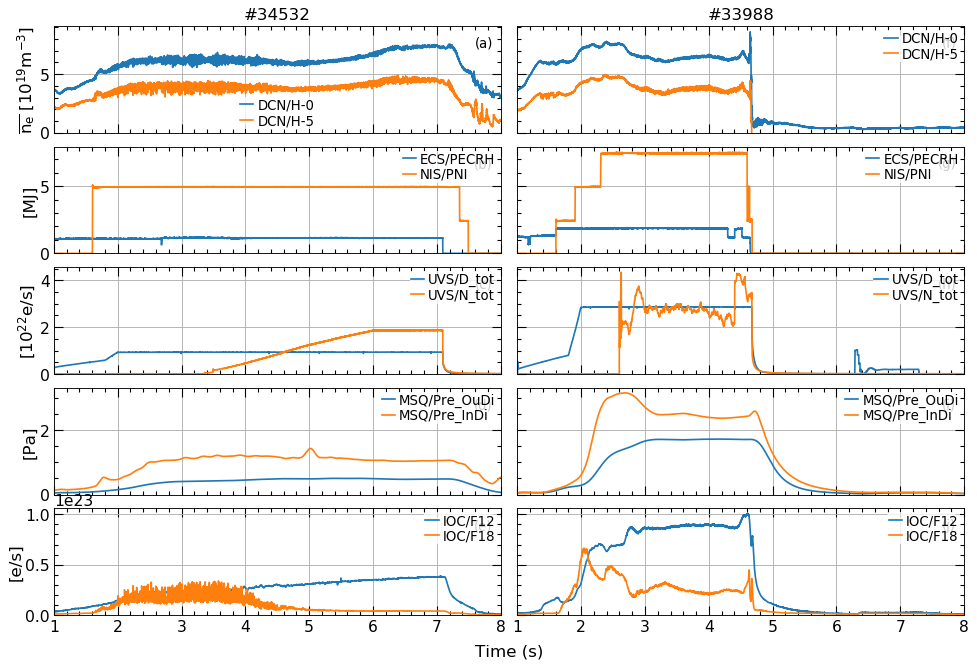

In [23]:
fig, axes, fig_name = plot_signals(
    data=data, postfixes="overview", boxes=([0]*2 + [1]*3 + [2]*2 + [3]*2 + [4]*2 + [5]*2 + [6]*3 + [7]*2 + [8]*2 + [9]*2), ncols=2, maintain_colors=True,
    legend_kw=dict(loc='best'),
    sharey='row',
    signal_multipliers=([1E-19] * 2 + [1E-6]*3 + [1E-22]*2 + [133.0]*2 + [1.0]*2)*2,
    y_labels=[r"$\overline{n_e}$ [$10^{19}m^{-3}]$", "[MJ]", r"$[10^{22}e/s]$", "[Pa]", "[e/s]"]+[None]*5, 
    y_mins=0.0,
    t_begin=1, t_end=8,
    write_shots=False,
)
axes[0,0].set_title('#'+str(data.shots[0]))
axes[0,1].set_title('#'+str(data.shots[11]))

## Saving images

To save a png of the plotted figure just do:

In [24]:
from ipfnpytools.save_figure import save_figure

In [25]:
save_figure(fig=fig, name="./Images/Example.png")

Figure saved to /home/guimas/Documents/Software/AUG/Images/Example.png.png
